<a href="https://colab.research.google.com/github/Wellsantigo/Previs-o-de-Percentual/blob/main/exercicio_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

aprovacao_alunos = pd.read_excel('/content/C├│pia de aprovacao_alunos (1).xlsx')
aprovacao_alunos.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


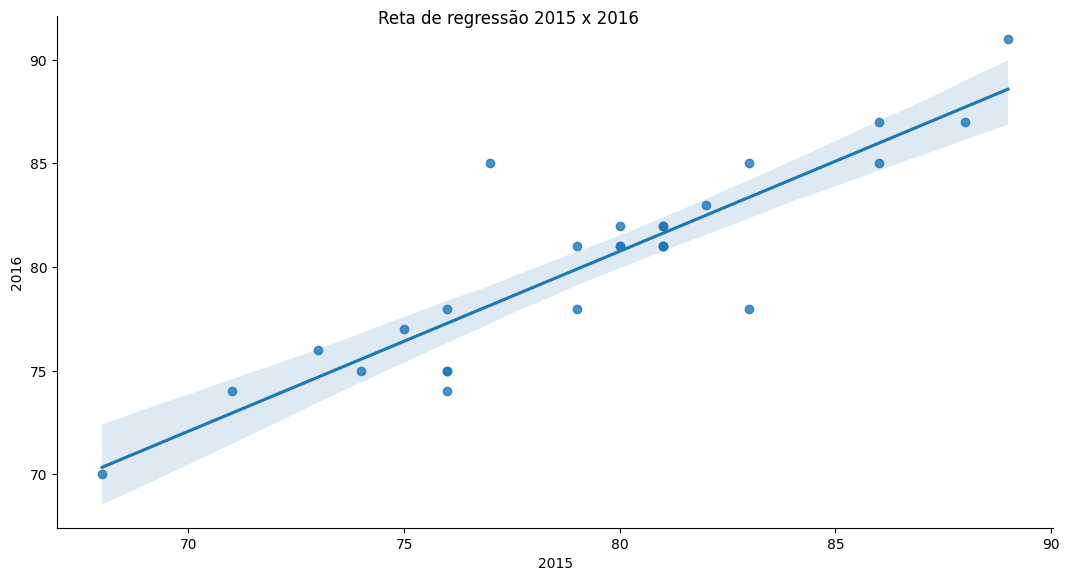

In [ ]:
ax = sns.lmplot(x='ano_2015', y='ano_2016',data=aprovacao_alunos)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de regressão 2015 x 2016')
ax.set_xlabels('2015')
ax.set_ylabels('2016')
ax;

In [ ]:
aprovacao_alunos.corr()

<ipython-input-52-7b9df52fd17e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  aprovacao_alunos.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
import statsmodels.api as sm
y = aprovacao_alunos.ano_2016
x = sm.add_constant(aprovacao_alunos.ano_2015)

In [ ]:
resultado_regressao = sm.OLS(y,x).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.02e-10
Time:                        19:48:23   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

R-squared: 80%

acima de 70% possitiva

In [ ]:
aprovacao_alunos['y_previsto']= resultado_regressao.predict()
aprovacao_alunos.head()

,UF,ano_2015,ano_2016,y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [ ]:
aprovacao_alunos['residuo'] = aprovacao_alunos['y_previsto'] - aprovacao_alunos['ano_2016']
aprovacao_alunos.head()

,UF,ano_2015,ano_2016,y_previsto,residuo
0,Rondonia,77,85,85,0
1,Acre,79,81,81,0
2,Amazonas,83,85,85,0
3,Roraima,81,82,82,0
4,Para,73,76,76,0
